# 🏅 2008 Olympic Medalists: Data Analysis🏅

The 2008 Summer Olympics brought together the world’s top athletes to compete in various sports, earning gold, silver, and bronze medals for their exceptional performances. The goal of this analysis is to clean, organize, and analyze the medalist data to uncover meaningful insights about the event.

![Olympics](/Users/jordynsmall/Documents/Small-Python-Portfolio/TidyData-Project/400-3-1.jpg)


## Data Tidying

### Reading in the Data
Before we begin cleaning and analyzing, we must first import the dataset and take a look at its structure.
- This allows us to inspect how the data is structured and understand its format before making any modifications.

In [31]:
# Let's read in the data 

import pandas as pd

olympics = pd.read_csv("/Users/jordynsmall/Documents/Small-Python-Portfolio/TidyData-Project/olympics_08_medalists.csv")

olympics.head() # showing the first 5 rows of data 

# Initial observations: Many of the column names have two variables (i.e - Gender and sport, hence why there are so many nulls)

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
olympics.describe()

# There are 1875 medalists in our dataset over 70 different sports

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
count,1875,11,9,85,81,12,10,72,35,36,...,6,36,36,39,39,24,21,28,16,27
unique,1875,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
top,Aaron Armstrong,bronze,bronze,silver,silver,silver,silver,silver,bronze,bronze,...,gold,bronze,gold,silver,gold,gold,bronze,bronze,bronze,bronze
freq,1,4,4,31,28,4,4,24,12,12,...,2,12,12,13,13,8,7,14,8,13


### Initial Observations 

At first glance, the dataset contains 1,875 Olympic medalists and information across 70 different sports. However, there’s a key issue:

- Each sport is stored as a separate column.
- Gender and sport are combined in column names.
- Many cells contain NaN values since most athletes only won a medal in one sport.

This structure violates tidy data principles, where each variable should have its own column. Instead, we will reshape it into a long format, making it more useful for analysis.

### Reshaping the Data (Wide to Long Format)

To tidy the data, we will pivot all sport columns into a single column. This will:

1. Keep the athlete's name as is.
2. Combine all sports into one column.
3. Move medal types into a separate column.

In [33]:
# We want to bring all of the sports into one column and have the medal classification in another column

olympics_melted = pd.melt(olympics,
        id_vars = "medalist_name", # keeping names the same
        value_vars = olympics.columns.difference(["medalist_name"]), # pivoting everything except first column
        var_name = "sport", # name of new columns
        value_name = "medal") # where the values go

olympics_melted.head()

,medalist_name,sport,medal
0,Aaron Armstrong,female_archery,NaN
1,Aaron Peirsol,female_archery,NaN
2,Abdullo Tangriev,female_archery,NaN
3,Abeer Abdelrahman,female_archery,NaN
4,Abhinav,female_archery,NaN


Now, each row represents one medal won by an athlete, making the dataset much easier to analyze.

### Extracting Gender and Sport
The "sport" column still contains both the gender and the sport (e.g., "male_swimming"). We need to split this into two separate columns:
- gender (Male/Female)
- sport (Swimming, Archery, Gymnastics, etc.)

In [34]:
olympics_melted[["gender","sport"]] = olympics_melted['sport'].str.split("_", expand=True)

# Reordering the dataset so the order makes more sense
olympics_melted = olympics_melted[['medalist_name', 'sport', 'gender', 'medal']]

olympics_melted.head()

,medalist_name,sport,gender,medal
0,Aaron Armstrong,archery,female,NaN
1,Aaron Peirsol,archery,female,NaN
2,Abdullo Tangriev,archery,female,NaN
3,Abeer Abdelrahman,archery,female,NaN
4,Abhinav,archery,female,NaN


### Handling Missing Values
Since each row originally contained one athlete but many columns for sports, most values were NaN in the melted dataset. Now that we’ve restructured it, we can remove any remaining NaN values to ensure our dataset only contains valid medalist records.

In [35]:
# Let's remove these null values 

olympics_df = olympics_melted.dropna()

olympics_df

# Awesome, we now have 1875 medalists again!

,medalist_name,sport,gender,medal
249,Bérengère Schuh,archery,female,bronze
285,Chen Ling,archery,female,silver
597,Guo Dan,archery,female,silver
781,Joo Hyun-Jung,archery,female,gold
1316,Park Sung-hyun,archery,female,silver
...,...,...,...,...
131074,Vencelas Dabaya,weightlifting,male,silver
131087,Viktors Ščerbatihs,weightlifting,male,bronze
131180,Yoandry Hernández,weightlifting,male,bronze
131188,Yordanis Borrero,weightlifting,male,bronze


### Checking for Duplicates
To ensure data integrity, we check for duplicate names. Since some athletes may have won multiple medals, duplicate names aren’t necessarily errors but should be reviewed.
- We are checking for accidental duplicate entries rather than legitimate multiple-medalists.

In [36]:
# Let's check for duplicates 

duplicates = olympics_df[olympics_df.duplicated(subset="medalist_name")]
duplicates

# Earlier, we knew that there were 1875 people in our dataset, now there are so many more

,medalist_name,sport,gender,medal


There are no duplicate names in our dataset!

### Final Cleaned Dataset
Now, we have a tidy dataset with 1,875 unique Olympic medalists, their sports, genders, and the medals they won.

In [13]:
olympics_df.head(10)

,medalist_name,sport,gender,medal
249,Bérengère Schuh,archery,female,bronze
285,Chen Ling,archery,female,silver
597,Guo Dan,archery,female,silver
781,Joo Hyun-Jung,archery,female,gold
1316,Park Sung-hyun,archery,female,silver
1549,Sophie Dodemont,archery,female,bronze
1720,Virginie Arnold,archery,female,bronze
1821,Yun Ok-hee,archery,female,bronze
1830,Zhang Juanjuan,archery,female,gold
1941,Alicia Sacramone,artistic gymnastics,female,silver


- The data is now structured properly, allowing for easy aggregation, grouping, and visualization.

- This sets us up for the next step: data aggregation and visualization!

## Data Aggregation

Now that we have a cleaned dataset of 1,875 unique Olympic medalists, we can analyze the distribution of medals across different sports and genders. Aggregating the data allows us to uncover which sports awarded the most medals and compare participation by gender.

### Total Medals by Sport
First, let's determine which sports had the most medalists by counting the number of medals awarded in each sport.

In [37]:
olympics_sports = olympics_df.groupby('sport')['medal'].count().sort_values(ascending = False)
olympics_sports

sport
athletics                166
rowing                   141
swimming                 125
association football     109
field hockey              98
handball                  85
water polo                78
canoeing and kayaking     74
baseball                  72
volleyball                72
basketball                71
judo                      56
sailing                   54
fencing                   54
artistic gymnastics       49
softball                  45
weightlifting             45
freestyle wrestling       44
track cycling             44
boxing                    44
shooting sport            43
equestrian sport          38
taekwondo                 32
synchronized swimming     29
diving                    29
greco-roman wrestling     27
badminton                 22
rhythmic gymnastics       21
archery                   20
table tennis              18
tennis                    18
beach volleyball          12
road bicycle racing       11
mountain biking            6
trampoli

The dataset reveals that athletics, rowing, and swimming have the highest medal counts, with athletics leading at 166 medals. The distribution of medals across sports is uneven, with a steep drop-off after the top sports. This suggests that some sports dominate in medal counts, likely due to having more events or broader participation

### Medal Distribution by Gender
Now, let’s analyze the distribution of medals between male and female athletes.

In [14]:
olympics_gender = olympics_df.groupby('gender')['medal'].count().sort_values(ascending = False)
olympics_gender

gender
male      1032
female     843
Name: medal, dtype: int64

The distribution of Olympic medals by gender indicates that male athletes (1,032 medals) have won more medals than female athletes (843 medals).

### Focusing on Athletics – The Most Medalized Sport
Based on our aggregation, Athletics had the highest number of medal winners. Let's filter the dataset to focus on gold medalists in Athletics.

In [22]:
# Let's look more at athetics since this sport has the most medal winners

# here are the gold medal winners
athletics_gold = olympics_df[(olympics_df['sport'] == 'athletics') & (olympics_df['medal'] == 'gold')]
athletics_gold.head(10)

# we can use this aggregation to further visualize by gender 

,medalist_name,sport,gender,medal
5806,Barbora Špotáková,athletics,female,gold
5946,Christine Ohuruogu,athletics,female,gold
5959,Constantina Diță,athletics,female,gold
6007,Dawn Harper-Nelson,athletics,female,gold
6165,Françoise Mbango Etone,athletics,female,gold
6233,Gölnara Galkina-Sämitevä,athletics,female,gold
6239,Hanna Mariën,athletics,female,gold
6489,Kim Gevaert,athletics,female,gold
6711,Mary Wineberg,athletics,female,gold
6734,Maurren Maggi,athletics,female,gold


## Visualization

Now that we have aggregated key insights from the data, we can create visualizations to better interpret:

- Which sports had the highest medal counts

- The distribution of medals by gender 

Next, we will use data visualizations to present these insights!

### Overall Medal Distribution
To better understand the distribution of medals awarded in the 2008 Olympics, we visualize the breakdown of gold, silver, and bronze medals in the dataset.


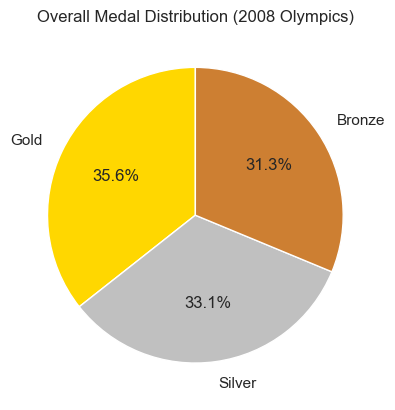

In [79]:
import matplotlib.pyplot as plt

# Define medal categories and their respective counts
names = ["Gold", "Silver", "Bronze"]
values = olympics_df["medal"].value_counts().tolist()  # Get medal counts

# Define colors for the medals
colors = ["#FFD700", "#C0C0C0", "#CD7F32"]  # Gold, Silver, Bronze

# Create the pie chart
plt.pie(values, 
        labels=names, 
        colors=colors, 
        labeldistance=1.15, 
        autopct="%1.1f%%", 
        startangle=90)

plt.title("Overall Medal Distribution (2008 Olympics)")
plt.show()


- Gold medals make up the largest share of total medals, indicating the high number of first-place finishes across all sports.
- Silver and bronze medals are relatively balanced, suggesting a consistent structure in event awards.

### Top 10 Sports by Medal Count
To identify which sports had the highest number of medals awarded in the 2008 Olympics, we visualize the top 10 sports by total medal count. The bar chart below breaks down the number of gold, silver, and bronze medals awarded in each of these top sports.


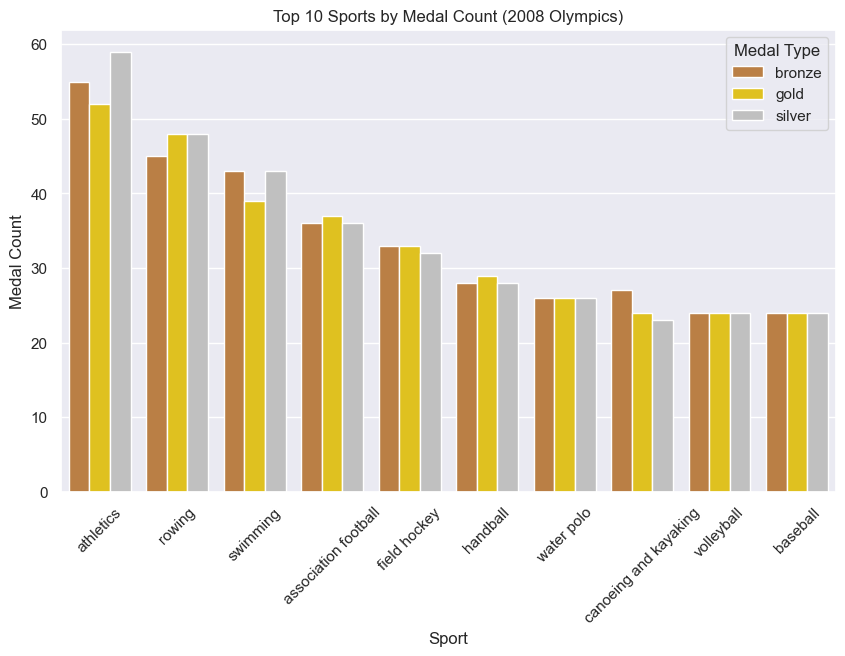

In [80]:
import seaborn as sns

# Aggregate the number of medals per sport and medal type
olympics_sports_medal = olympics_df.groupby(["sport", "medal"])["medalist_name"].count().reset_index(name="count")

# Get the top 10 sports by total medal count
top_sports = (
    olympics_df["sport"]
    .value_counts()
    .head(10)
    .index
)
# Filter data to only include the top 10 sports
filtered_medal_data = olympics_sports_medal[olympics_sports_medal["sport"].isin(top_sports)]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))

medal_colors = {
    "gold": "#FFD700",   # Gold
    "silver": "#C0C0C0", # Silver
    "bronze": "#CD7F32"  # Bronze
}

# Create a bar chart
sns.barplot(
    x="sport",
    y="count",
    hue="medal",
    data=filtered_medal_data,
    order=top_sports, # Ensure order follows the top 10 ranking
    palette=medal_colors
)

# Format the plot
plt.xlabel("Sport")
plt.ylabel("Medal Count")
plt.title("Top 10 Sports by Medal Count (2008 Olympics)")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend(title="Medal Type")
plt.show()


The bar chart presents the **top 10 sports by total medal count** in the **2008 Olympics**, broken down by gold, silver, and bronze medals. 

- Athletics, rowing, and swimming led the medal tally, with athletics having the highest overall count.
    - Athletics had the most medals (166 total), highlighting its broad participation.
    - Rowing followed with 141 medals, showing strong event diversity.
    - Swimming came in third (125 medals), likely due to multi-event athletes.
- Team sports like association football, field hockey, and handball had relatively lower medal counts, likely because fewer medals were awarded per event compared to individual sports.

### Athletics Medal Count by Gender

Athletics was the most medal-heavy sport in the 2008 Olympics, with 166 total medals awarded. This category includes various track and field events, such as sprints, long-distance running, jumps, and throws. 

To better understand the gender distribution in athletics, the bar chart below breaks down the number of gold, silver, and bronze medals** won by male and female athletes.

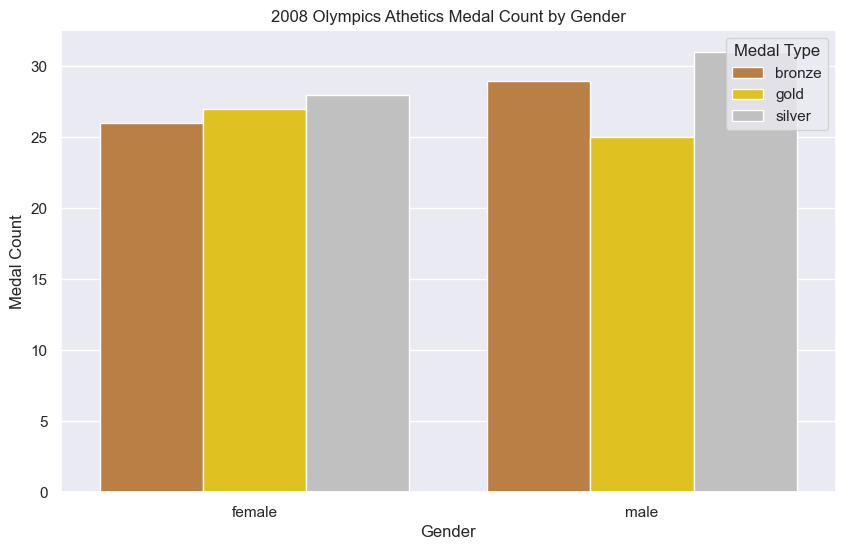

In [81]:
olympics_sports_gender = olympics_df.groupby(["sport", "gender", "medal"])["medalist_name"].count().reset_index(name="count")


filtered_df = olympics_sports_gender[olympics_sports_gender["sport"] == "athletics"]

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))


# Create and display the plot
sns.barplot(x="gender",
            y="count",
            hue="medal",
            data = filtered_df,
            palette=medal_colors,  # Use the custom palette
            )  

plt.title("2008 Olympics Athetics Medal Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Medal Count")
plt.legend(title="Medal Type")
plt.show()

Both male and female athletes had strong participation in athletics. Medals were distributed fairly evenly, but male athletes had a slight advantage in total medal count. However, females tended to earn more gold medals than males.